Calculating Means and Variances for pituitary
Mean values for each channel (R, G, B): {'R': 49.26789291589136, 'G': 49.26789291589136, 'B': 49.26789291589136}
Variance values for each channel (R, G, B): {'R': 1737.0614408600184, 'G': 1737.0614408600184, 'B': 1737.0614408600184}


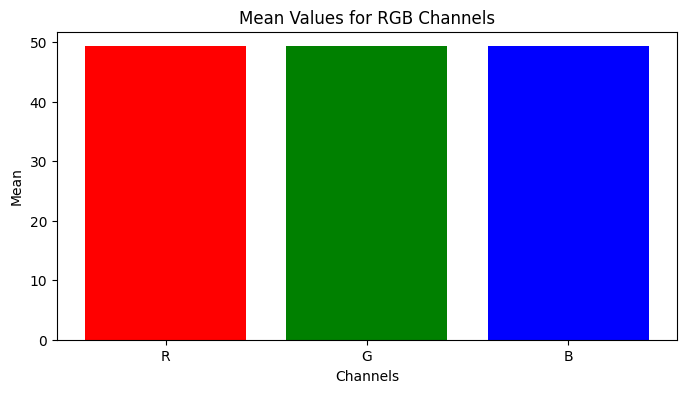

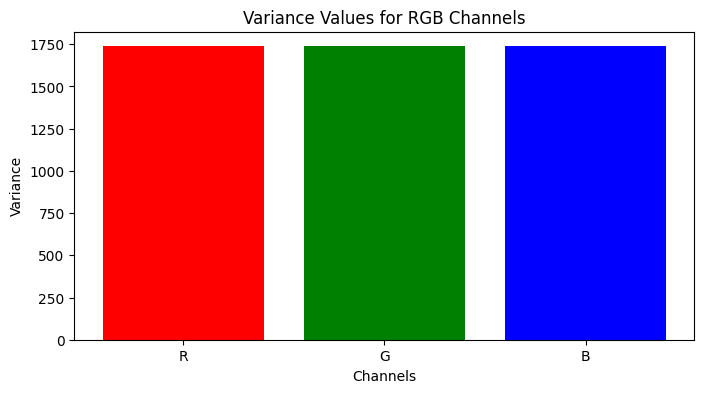

Calculating Means and Variances for notumor
Mean values for each channel (R, G, B): {'R': 60.71833620313725, 'G': 60.721338444466305, 'B': 60.76132097256693}
Variance values for each channel (R, G, B): {'R': 3925.5069140957066, 'G': 3925.5333829203105, 'B': 3927.142774506975}


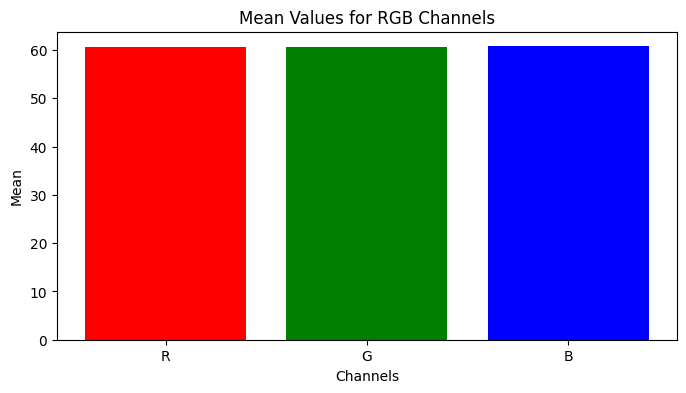

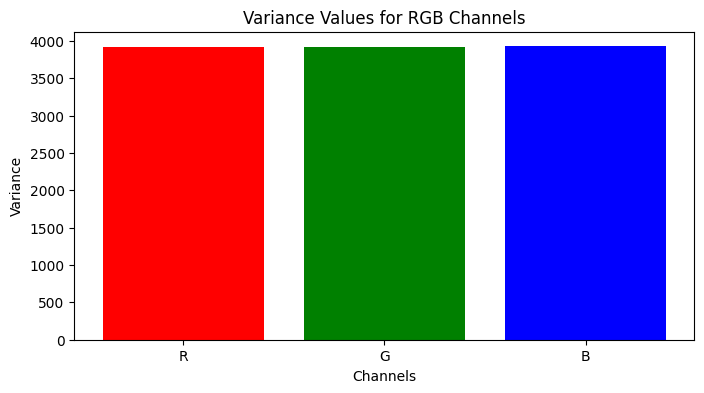

In [17]:
import cv2
import numpy as np
import os


def calculate_mean_variance(images_folder):
    # Get a list of image file names in the specified folder
    image_files = [f for f in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, f))]

    # Initialize dictionaries to store mean and variance values for each color channel
    mean_values = {'R': [], 'G': [], 'B': []}
    variance_values = {'R': [], 'G': [], 'B': []}

    for img_file in image_files:
        # Read each image
        img = cv2.imread(os.path.join(images_folder, img_file))

        # Split image into color channels (BGR format)
        b, g, r = cv2.split(img)

        # Calculate mean and variance for each color channel
        for channel, channel_name in zip((r, g, b), ('R', 'G', 'B')):
            mean = np.mean(channel)
            variance = np.var(channel)

            # Append mean and variance to respective lists
            mean_values[channel_name].append(mean)
            variance_values[channel_name].append(variance)

    # Calculate overall mean and variance across all images for each channel
    overall_mean = {channel: np.mean(values) for channel, values in mean_values.items()}
    overall_variance = {channel: np.mean(values) for channel, values in variance_values.items()}

    return overall_mean, overall_variance


# Replace 'path_to_images_folder' with the actual path to your folder containing images
folder_path = '/Users/nikitarodionov/Downloads/archive/Training/pituitary'
means, variances = calculate_mean_variance(folder_path)
print("Mean values for each channel (R, G, B):", means)
print("Variance values for each channel (R, G, B):", variances)